In [1]:
from netCDF4 import Dataset, date2num, num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mplticker
import matplotlib.colors as colors
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.dates as mdates
import string
import datetime as dt
import cftime as cf

from scipy import stats

%matplotlib inline

In [2]:
gridDS= Dataset('/scratch/srai6/EddyKillingPaper3/CESM/newGlobalGrid_tripolePOP_0.1deg.nc')
KMT = np.array(gridDS.variables['KMT'])
UAREA = np.array(gridDS.variables['UAREA'])
ULAT = np.array(gridDS.variables['ULAT'])
ULONG = np.array(gridDS.variables['ULONG'])
landMask = KMT < 30

In [3]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/all7yrs/'
rotFile = 'avgEPonPosAndNegVort_0100km.nc'
strFile = 'avgEP_on45degAndMinus45Strain_0100km.nc'
TS_File = 'EP_rotAndstr_LatBandSeries_0100km.nc'
okubo_File = 'avgOkuboWeissAndStrainDirec_0100km.nc'

rotDS = Dataset(fldLoc + rotFile)
strDS = Dataset(fldLoc + strFile)
timeSeriesDS = Dataset(fldLoc + TS_File)
okuboDS = Dataset(fldLoc + okubo_File)

In [4]:
avg_posVort_EP = np.array(rotDS.variables['posVort_EP'][:,:])
avg_negVort_EP = np.array(rotDS.variables['negVort_EP'][:,:])

avg_posThetaEP_str = np.array(strDS.variables['posThetaEP_str'][:,:])
avg_negThetaEP_str = np.array(strDS.variables['negThetaEP_str'][:,:])

avg_posVort_EP[avg_posVort_EP == 0.0] =float('nan')
avg_negVort_EP[avg_negVort_EP == 0.0] =float('nan')
avg_posThetaEP_str[avg_posThetaEP_str == 0.0] =float('nan')
avg_negThetaEP_str[avg_negThetaEP_str == 0.0] =float('nan')

avg_posVort_EP[landMask] =float('nan')
avg_negVort_EP[landMask] =float('nan')
avg_posThetaEP_str[landMask] =float('nan')
avg_negThetaEP_str[landMask] =float('nan')

avg_curl_stress = np.array(okuboDS.variables['curl_stress'][:,:])
avg_theta_tau = np.array(okuboDS.variables['theta1_tau'][:,:])

avg_curl_stress[0,landMask] =float('nan')
avg_theta_tau[0,landMask] =float('nan')

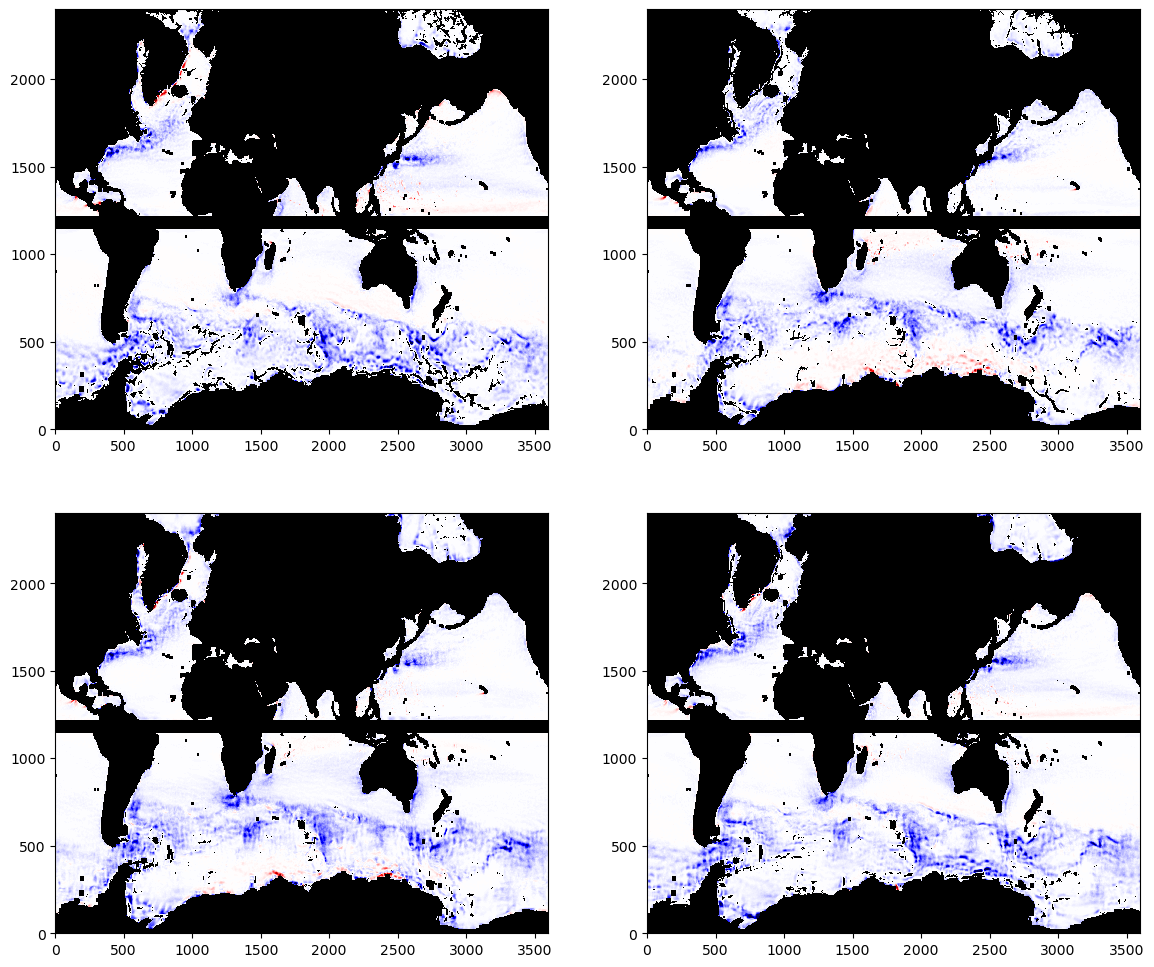

In [5]:
v = 2
cmap=plt.get_cmap('seismic').copy()
cmap.set_bad('k')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
ax = axes[0,0]
ax.pcolormesh(avg_posVort_EP, vmin=-v, vmax=v, cmap=cmap)
ax = axes[0,1]
ax.pcolormesh(avg_negVort_EP, vmin=-v, vmax=v, cmap=cmap)
ax = axes[1,0]
ax.pcolormesh(avg_posThetaEP_str, vmin=-v, vmax=v, cmap=cmap)
ax = axes[1,1]
ax.pcolormesh(avg_negThetaEP_str, vmin=-v, vmax=v, cmap=cmap)

In [6]:
np.min(avg_posVort_EP)

nan

In [7]:
avg_posVort_EP[2000,2000]

nan

In [8]:
timeSeriesDS.variables.keys()

dict_keys(['posThetaEP_str_20_40N', 'negThetaEP_str_20_40N', 'posVort_EP_20_40N', 'negVort_EP_20_40N', 'posThetaEP_str_5S_5N', 'negThetaEP_str_5S_5N', 'posVort_EP_5S_5N', 'negVort_EP_5S_5N', 'posThetaEP_str_15_40S', 'negThetaEP_str_15_40S', 'posVort_EP_15_40S', 'negVort_EP_15_40S'])

In [9]:
posThetaEP_str_20_40N = np.array(timeSeriesDS.variables['posThetaEP_str_20_40N'][:], dtype=float)
negThetaEP_str_20_40N = np.array(timeSeriesDS.variables['negThetaEP_str_20_40N'][:], dtype=float)

posVort_EP_20_40N = np.array(timeSeriesDS.variables['posVort_EP_20_40N'][:], dtype=float)
negVort_EP_20_40N = np.array(timeSeriesDS.variables['negVort_EP_20_40N'][:], dtype=float)

posThetaEP_str_5S_5N = np.array(timeSeriesDS.variables['posThetaEP_str_5S_5N'][:], dtype=float)
negThetaEP_str_5S_5N = np.array(timeSeriesDS.variables['negThetaEP_str_5S_5N'][:], dtype=float)

posVort_EP_5S_5N = np.array(timeSeriesDS.variables['posVort_EP_5S_5N'][:], dtype=float)
negVort_EP_5S_5N = np.array(timeSeriesDS.variables['negVort_EP_5S_5N'][:], dtype=float)

posThetaEP_str_15_40S = np.array(timeSeriesDS.variables['posThetaEP_str_15_40S'][:], dtype=float)
negThetaEP_str_15_40S = np.array(timeSeriesDS.variables['negThetaEP_str_15_40S'][:], dtype=float)

posVort_EP_15_40S = np.array(timeSeriesDS.variables['posVort_EP_15_40S'][:], dtype=float)
negVort_EP_15_40S = np.array(timeSeriesDS.variables['negVort_EP_15_40S'][:], dtype=float)

In [10]:
vortArr_15_40S = np.stack((posVort_EP_15_40S, negVort_EP_15_40S), axis = 0)
vortArr_20_40N = np.stack((posVort_EP_15_40S, negVort_EP_15_40S), axis = 0)
vortArr_5S_5N = np.stack((posVort_EP_15_40S, negVort_EP_15_40S), axis = 0)

strArr_15_40S = np.stack((posThetaEP_str_15_40S, negThetaEP_str_15_40S), axis = 0)
strArr_20_40N = np.stack((posThetaEP_str_15_40S, negThetaEP_str_15_40S), axis = 0)
strArr_5S_5N = np.stack((posThetaEP_str_15_40S, negThetaEP_str_15_40S), axis = 0)

In [21]:
def plt2d(ax, pltArr, d, cmap, cbTitle, txt, figLabel, cb=True, extd='both'):
    m = ax.pcolormesh(pltArr, vmin=-d, vmax=d, cmap=cmap, rasterized=True)
    if cb:
        cb = plt.colorbar(m, ax=ax, extend=extd)
        cb.ax.tick_params(labelsize=12)
        if extd == 'both':
            p = 20
        else:
            p = 10
        cb.ax.set_title(cbTitle, size=12, pad = p)

    xpos = 0.6
    ypos = 0.85
    fsize = 12

    ax.text(xpos, ypos, txt, horizontalalignment='center', fontweight = 'heavy',  color ='white' ,
                        verticalalignment='center', transform=ax.transAxes, fontsize=fsize)

    xpos, ypos = 0.1, 0.85
    ax.text(xpos, ypos, figLabel, horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, 
            fontsize = 12, weight='heavy', color='white')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
def getRunAvg(array1D, ksize):
    ndays = len(array1D)
    
    ksize = 13
    half_ksize = ksize//2
    kernel = np.ones((ksize,), dtype=float)/ksize
    

    runAvg = np.convolve(array1D, kernel, mode='valid')
    lastindx = half_ksize+len(runAvg)
    
    plt_runAvg = np.ones((ndays), dtype =float) * float('nan')
    plt_runAvg[half_ksize:lastindx] = runAvg
    
    return plt_runAvg

def getCorrCoeffWithStdErr(arr1, arr2):
    coeff= np.corrcoef(arr1, arr2)[0, 1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(arr1, arr2)
    stdev_arr1 = np.std(arr1)
    stdev_arr2 = np.std(arr2)
    prob = 0.95
    Npoints = len(arr1)
    t_star = stats.t.cdf( 1 - (1-prob)/2, Npoints - 1 )
    std_err *= t_star *stdev_arr1/stdev_arr2
    return coeff, std_err
    
def plot_Trend(dates, array1DList, labelList, title, ax, showXticks=True):
    ndays = len(dates)
    
    narrs = len(array1DList)
    txt = '{0:s}\n'.format(title)
    
    pltArr = np.zeros((narrs, ndays), dtype =float)
    
    for i in range(narrs):
        pltArr[i,:] = getRunAvg(array1DList[i], 13)
        
    for i in range(1,narrs):
        r, stderr = getCorrCoeffWithStdErr(pltArr[0,:][~np.isnan(pltArr[0,:])], 
                                           pltArr[i,:][~np.isnan(pltArr[i,:])])
        if narrs<=2:
            txt += r'r = {0:>5.2f}$\pm${1:>4.2f}'.format(r, stderr)
        else:
            txt += r'r{0:d} = {1:>5.2f}$\pm${2:>4.2f}'.format(i,r, stderr)
    
    maxVals = []
    minVals = []
    for i in range(narrs):
        maxVals.append(np.nanmax(pltArr[i,:]))
        minVals.append(np.nanmin(pltArr[i,:]))
        ax.plot(dates, 
                pltArr[i,:], 
                rasterized = True, 
                label=labelList[i])
      
    
    maxy = max(maxVals)
    miny = min(minVals)
    
    diffy = maxy-miny

    ax.set_ylim([miny - 0.08 * diffy, (maxy + 0.5 * diffy)])

    ax.grid(visible=True, which='major', axis='both', linewidth=0.5, alpha = 0.5)
    ax.grid(visible=True, which='minor', axis='x', linewidth=0.1, alpha=0.2)
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_fmt)
    
    plt.setp(ax.yaxis.get_majorticklabels(), size=10)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=60, size=10)
    
    if showXticks==False:
        plt.setp(ax.get_xticklabels(), visible=False)
      
    ax.text(0.01, 1, txt, horizontalalignment='left', fontweight = 'heavy', 
                    verticalalignment='top', transform=ax.transAxes, fontsize=12)
    
    ax.legend(ncol = 2 , loc="upper right", fontsize = 12)


In [22]:
dateUnits = 'days since 0050-01-01 00:00:00'

ndays = 365

cfdates = num2date(7 * (np.arange(ndays) + 1) - 4, dateUnits)
strdates = ['{0:02d}/{1:02d}/{2:04d}'.format(d.month, d.day, d.year) for d in cfdates]
dates = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in strdates]

years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator(interval =4)  # every 4 month
months = mdates.MonthLocator(bymonth = (4,7,10))
#months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%b')

date_fmt = mdates.DateFormatter('%b %Y')

northMaskTitle = r'$20\degree N-40\degree N$'
southMaskTitle = r'$15\degree S-40\degree S$'
tropicTitle = r'$5\degree S-5\degree N$'

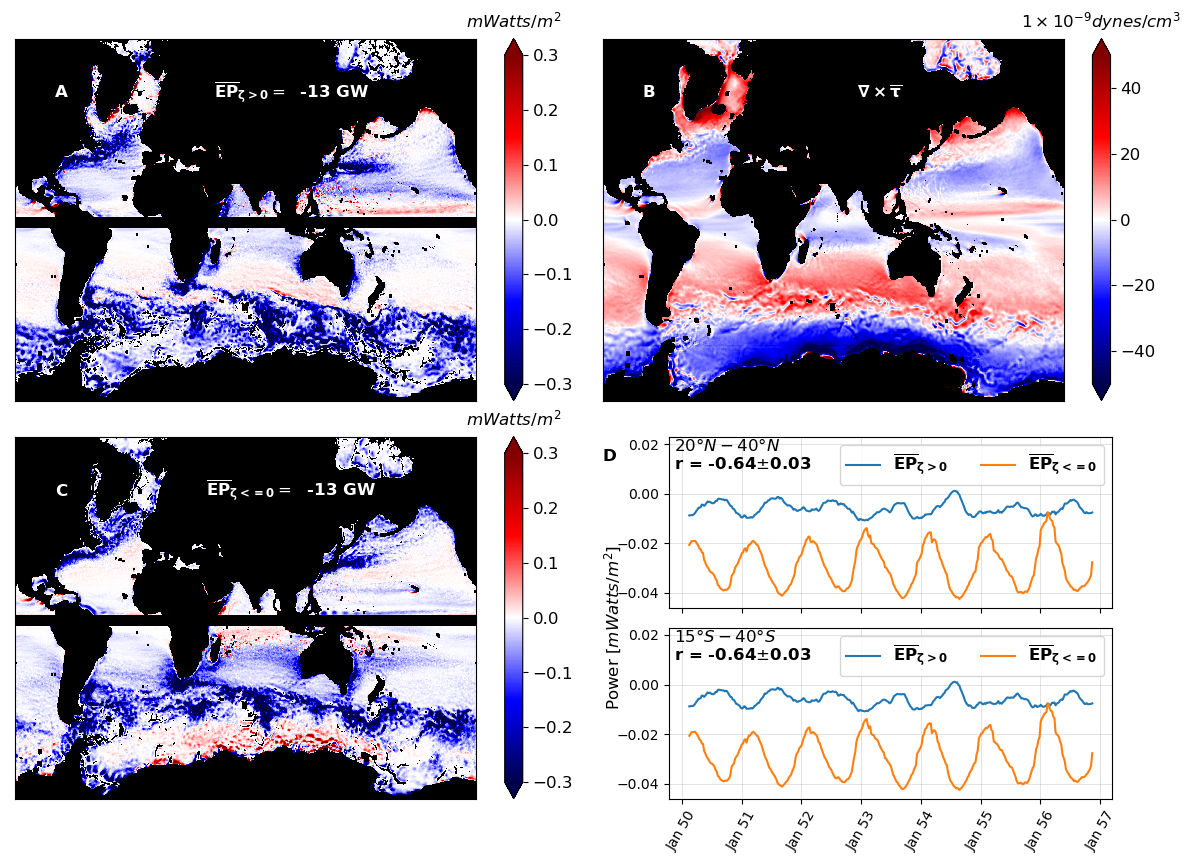

In [23]:
ratio = 1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('k')



##########################################################################
d = 0.3
ax = axes[0,0]
pltArr = avg_posVort_EP.copy() * ratio
txt = r'$\mathbf{\overline{EP}_{\zeta>0}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'A')


###########################################################################
d = 50
ax = axes[0,1]
pltArr = avg_curl_stress[0,:,:].copy() * 1e9
txt = r'$\mathbf{\nabla\times\overline{\tau}}$'
cbTitle = r'$1\times10^{-9} dynes/cm^3$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'B')



############################################################################
       
d = 0.3
ax =axes[1,0]

pltArr = avg_negVort_EP.copy() * ratio
cbTitle = r'$mWatts/m^2$'
txt = r'$\mathbf{\overline{EP}_{\zeta<=0}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'C')


############################################################################
axes[1,1].remove()
ax1 = fig.add_subplot(2, 2, 4)

plot_Trend(dates, vortArr_15_40S, 
           [r'$\mathbf{\overline{EP}_{\zeta>0}}$',r'$\mathbf{\overline{EP}_{\zeta<=0}}$'], 
           southMaskTitle, ax1)#, showXticks=False )

divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(dates, vortArr_20_40N, 
           [r'$\mathbf{\overline{EP}_{\zeta>0}}$',r'$\mathbf{\overline{EP}_{\zeta<=0}}$'], 
           northMaskTitle, axB, showXticks=False )

ax0 = divider.append_axes("left", size="15%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=12, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'D', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 12, weight='heavy', color='k')

ax0.axis('off')

ax0_right = divider.append_axes("right", size="15%", pad=0.0)
ax0_right.axis('off')

############################################################################
plt.subplots_adjust(left=0.01, right=0.98, bottom=0.01, top = 0.96,hspace=0.1, wspace=0.02)
plt.savefig('EP_zetaOrientationCESM.pdf', format='pdf', dpi=70)

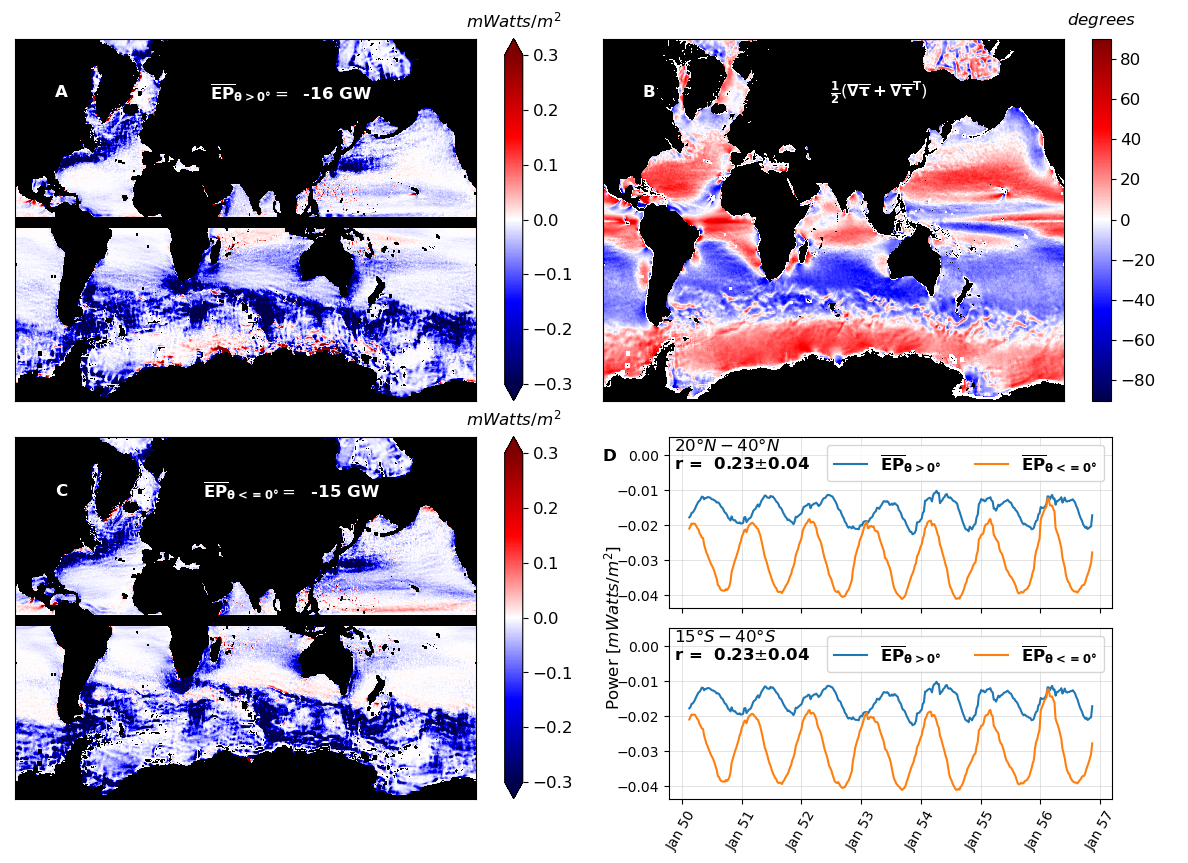

In [24]:
ratio = 1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('k')



##########################################################################
d = 0.3
ax = axes[0,0]
pltArr = avg_posThetaEP_str.copy() * ratio
txt = r'$\mathbf{\overline{EP}_{\theta>0\degree}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'A')


###########################################################################
d = 90
ax = axes[0,1]
pltArr = avg_theta_tau[0,:,:].copy()
txt = r'$\mathbf{\frac{1}{2}\left( \nabla\overline{\tau}+\nabla\overline{\tau}^T\right)}$'
cbTitle = r'$degrees$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'B', extd='neither')



############################################################################
       
d = 0.3
ax =axes[1,0]

pltArr = avg_negThetaEP_str.copy() * ratio
cbTitle = r'$mWatts/m^2$'
txt = r'$\mathbf{\overline{EP}_{\theta<=0\degree}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'C')


############################################################################
axes[1,1].remove()
ax1 = fig.add_subplot(2, 2, 4)

plot_Trend(dates, strArr_15_40S, 
           [r'$\mathbf{\overline{EP}_{\theta>0\degree}}$',
            r'$\mathbf{\overline{EP}_{\theta<=0\degree}}$'], 
           southMaskTitle, ax1)#, showXticks=False )

divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(dates, strArr_20_40N, 
           [r'$\mathbf{\overline{EP}_{\theta>0\degree}}$',
            r'$\mathbf{\overline{EP}_{\theta<=0\degree}}$'], 
           northMaskTitle, axB, showXticks=False )

ax0 = divider.append_axes("left", size="15%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=12, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'D', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 12, weight='heavy', color='k')

ax0.axis('off')

ax0_right = divider.append_axes("right", size="15%", pad=0.0)
ax0_right.axis('off')

############################################################################
plt.subplots_adjust(left=0.01, right=0.98, bottom=0.01, top = 0.96,hspace=0.1, wspace=0.02)
plt.savefig('EP_strainOrientationCESM.pdf', format='pdf', dpi=70)